Mean of T_2 is 1.0014206066270268, and standard deviation is 0.0009759444692565212
Mean of M_0  is 0.09996543845014774, and standard deviation is 6.454863857996108e-05


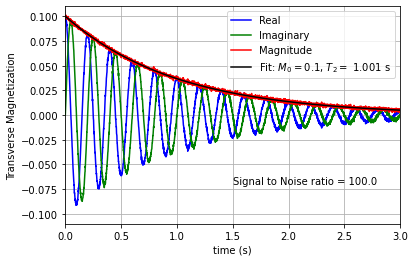

In [4]:
M0 = 0.1           # magnitude of transverse magnetization at t=0
f_b = 5.          # beat frequency
T2 = 1          # T2 relaxation time
sigma = 0.001    # noise level, standard deviation of normal distribution centred on zero



# Generate time points in seconds.  Here, I used one point every ms for 3 seconds.
npts = 3001
tpts = np.linspace(0,3,npts)



# Generate in- and out-of-phase (aka 'real' and 'imaginary') precession signal data.
# The signal is demodulated to give a low frequency beat (i.e. f_beat = f_precession - f_receiver)
# that will pass through the low pass filter of the detection system
# Non-correlated noise is generated independently for the real and imaginary signals.
    
real = M0*np.cos(2*np.pi*f_b*tpts)*np.exp(-tpts/T2)
r_noise = sigma*np.random.randn(npts)

imag = M0*np.sin(2*np.pi*f_b*tpts)*np.exp(-tpts/T2)
i_noise = sigma*np.random.randn(npts)

real_n = real + r_noise
imag_n = imag + i_noise



# Generate the magnitude data from the real and imaginary data. Without and with noise.

mag = np.sqrt(real**2+imag**2)
mag_n = np.sqrt(real_n**2+imag_n**2)



 # Define the fitting function and parameters   
def func_mag(t,m0,t2):        
    return m0*np.exp(-t/t2)




# Run curve fit and generate fit function data 

guess = [M0,T2]       # inital guesses (use model parameters for simplicity)
popt, pcov = curve_fit(func_mag, tpts, mag_n, p0=guess)     # curve fit
#print(popt[0],popt[1])                                      # ouput fit parameters M0 and T2
fitmag = func_mag(tpts, popt[0],popt[1])                    # generate fit function data



plt.plot(tpts, real_n, 'b', tpts, imag_n, 'g', tpts, mag_n, 'r', tpts, fitmag, 'k')
plt.axis([0, 3, -M0*1.1, M0*1.1])
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('Transverse Magnetization')
plt.legend(('Real','Imaginary', 'Magnitude', 'Fit: '+ '$M_0 =$' + str(round(popt[0],3))
          +',' + ' $T_2 =$ ' + str(round(popt[1],3)) + ' s' ),loc='upper right')
#plt.title('Free Induction Decay - with noise')


stats = []
trials = 100
M0vals = np.zeros(trials)
T2starvals = np.zeros(trials)
#print(T2star)
for i in range(0, trials):
    real = M0*np.cos(2*np.pi*f_b*tpts)*np.exp(-tpts/T2) #Mx
    r_noise = sigma*np.random.randn(npts) #nx

    imag = M0*np.sin(2*np.pi*f_b*tpts)*np.exp(-tpts/T2) #My
    i_noise = sigma*np.random.randn(npts) #ny

    real_n = real + r_noise
    imag_n = imag + i_noise

    mag = np.sqrt(real**2+imag**2)
    mag_n = np.sqrt(real_n**2+imag_n**2)

    T2starvals[i] = np.array(popt[1])
    #T2star = np.append(T2star, stats)
    M0vals[i] = popt[0]
    
    guess = [M0,T2]       # inital guesses (use model parameters for simplicity)
    popt, pcov = curve_fit(func_mag, tpts, mag_n, p0=guess)     # curve fit
    fitmag = func_mag(tpts, popt[0],popt[1])                    # generate fit function data
print(f'Mean of T_2 is {np.mean(T2starvals)}, and standard deviation is {np.std(T2starvals)}')
print(f'Mean of M_0  is {np.mean(M0vals)}, and standard deviation is {np.std(M0vals)}')
plt.text(1.5,-0.07 , f'Signal to Noise ratio = {np.round(np.mean(M0vals)/sigma)}')

plt.savefig(f'No_sq_no_offset_M0={M0}_Sigma={sigma}.png', bbox_inches='tight')


Mean of T_2 is 0.8542379491163077, and standard deviation is 0.017599046923420104
Mean of M_0  is 0.09236625784492399, and standard deviation is 0.0007435178744188898


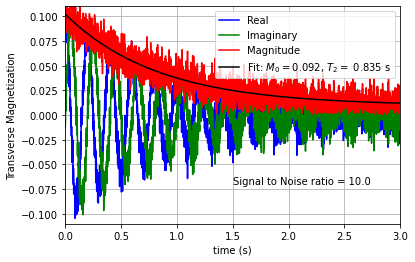

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit




# FID simulation parameters

M0 = 0.1           # magnitude of transverse magnetization at t=0
f_b = 5.          # beat frequency
T2 = 1          # T2 relaxation time
sigma = 0.01    # noise level, standard deviation of normal distribution centred on zero



# Generate time points in seconds.  Here, I used one point every ms for 3 seconds.
npts = 3001
tpts = np.linspace(0,3,npts)



# Generate in- and out-of-phase (aka 'real' and 'imaginary') precession signal data.
# The signal is demodulated to give a low frequency beat (i.e. f_beat = f_precession - f_receiver)
# that will pass through the low pass filter of the detection system
# Non-correlated noise is generated independently for the real and imaginary signals.
    
real = M0*np.cos(2*np.pi*f_b*tpts)*np.exp(-tpts/T2)
r_noise = sigma*np.random.randn(npts)

imag = M0*np.sin(2*np.pi*f_b*tpts)*np.exp(-tpts/T2)
i_noise = sigma*np.random.randn(npts)

real_n = real + r_noise
imag_n = imag + i_noise



# Generate the magnitude data from the real and imaginary data. Without and with noise.

mag = np.sqrt(real**2+imag**2)
mag_n = np.sqrt(real_n**2+imag_n**2)



 # Define the fitting function and parameters   
def func_mag(t,m0,t2, b):        
    return m0*np.exp(-t/t2) + b




# Run curve fit and generate fit function data 

guess = [M0,T2, 0.02]       # inital guesses (use model parameters for simplicity)
popt, pcov = curve_fit(func_mag, tpts, mag_n, p0=guess)     # curve fit
#print(popt[0],popt[1])                                      # ouput fit parameters M0 and T2
fitmag = func_mag(tpts, popt[0],popt[1], popt[2])                    # generate fit function data



plt.plot(tpts, real_n, 'b', tpts, imag_n, 'g', tpts, mag_n, 'r', tpts, fitmag, 'k')
plt.axis([0, 3, -M0*1.1, M0*1.1])
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('Transverse Magnetization')
plt.legend(('Real','Imaginary', 'Magnitude', 'Fit: '+ '$M_0 =$' + str(round(popt[0],3))
          +',' + ' $T_2 =$ ' + str(round(popt[1],3)) + ' s' ),loc='upper right')
#plt.title('Free Induction Decay - with noise')


stats = []
trials = 100
M0vals = np.zeros(trials)
T2starvals = np.zeros(trials)
#print(T2star)
for i in range(0, trials):
    real = M0*np.cos(2*np.pi*f_b*tpts)*np.exp(-tpts/T2) #Mx
    r_noise = sigma*np.random.randn(npts) #nx

    imag = M0*np.sin(2*np.pi*f_b*tpts)*np.exp(-tpts/T2) #My
    i_noise = sigma*np.random.randn(npts) #ny

    real_n = real + r_noise
    imag_n = imag + i_noise

    mag = np.sqrt(real**2+imag**2)
    mag_n = np.sqrt(real_n**2+imag_n**2)

    T2starvals[i] = np.array(popt[1])
    #T2star = np.append(T2star, stats)
    M0vals[i] = popt[0]
    
    guess = [M0,T2, 0.02]       # inital guesses (use model parameters for simplicity)
    popt, pcov = curve_fit(func_mag, tpts, mag_n, p0=guess)     # curve fit
    fitmag = func_mag(tpts, popt[0],popt[1], popt[2])                    # generate fit function data
print(f'Mean of T_2 is {np.mean(T2starvals)}, and standard deviation is {np.std(T2starvals)}')
print(f'Mean of M_0  is {np.mean(M0vals)}, and standard deviation is {np.std(M0vals)}')
plt.text(1.5,-0.07 , f'Signal to Noise ratio = {np.round(np.mean(M0)/sigma)}')

plt.savefig(f'No_sq_with_offset_M0={M0}_Sigma={sigma}.png' , bbox_inches='tight')


Mean of T_2 is 1.0000099868233672, and standard deviation is 0.0017935413944947332
Mean of M_0  is 0.10000179759257449, and standard deviation is 8.249002403799262e-05


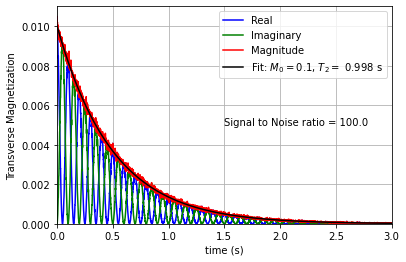

In [6]:
# FID simulation parameters

M0 = 0.1           # magnitude of transverse magnetization at t=0
f_b = 5.          # beat frequency
T2 = 1          # T2 relaxation time
sigma = 0.001    # noise level, standard deviation of normal distribution centred on zero



# Generate time points in seconds.  Here, I used one point every ms for 3 seconds.
npts = 3001
tpts = np.linspace(0,3,npts)



# Generate in- and out-of-phase (aka 'real' and 'imaginary') precession signal data.
# The signal is demodulated to give a low frequency beat (i.e. f_beat = f_precession - f_receiver)
# that will pass through the low pass filter of the detection system
# Non-correlated noise is generated independently for the real and imaginary signals.
    
real = M0*np.cos(2*np.pi*f_b*tpts)*np.exp(-tpts/T2)
r_noise = sigma*np.random.randn(npts)

imag = M0*np.sin(2*np.pi*f_b*tpts)*np.exp(-tpts/T2)
i_noise = sigma*np.random.randn(npts)

real_n = real + r_noise
imag_n = imag + i_noise



# Generate the magnitude data from the real and imaginary data. Without and with noise.

mag = np.sqrt(real**2+imag**2)
mag_n = real_n**2+imag_n**2



 # Define the fitting function and parameters   
def func_mag(t,m0,t2, b):        
    return (m0*np.exp(-t/t2))**2 + b




# Run curve fit and generate fit function data 

guess = [M0,T2, 0.02]       # inital guesses (use model parameters for simplicity)
popt, pcov = curve_fit(func_mag, tpts, mag_n, p0=guess)     # curve fit
#print(popt[0],popt[1])                                      # ouput fit parameters M0 and T2
fitmag = func_mag(tpts, popt[0],popt[1], popt[2])                    # generate fit function data

plt.plot(tpts, real_n**2, 'b', tpts, imag_n**2, 'g', tpts, mag_n, 'r', tpts, fitmag, 'k')
plt.axis([0, 3, 0, (M0**2)*1.1])
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('Transverse Magnetization')
plt.legend(('Real','Imaginary', 'Magnitude', 'Fit: '+ '$M_0 =$' + str(round(popt[0],3))
          +',' + ' $T_2 =$ ' + str(round(popt[1],3)) + ' s' ),loc='upper right')
#plt.title('Free Induction Decay - with noise')




stats = []
trials = 100
M0vals = np.zeros(trials)
T2starvals = np.zeros(trials)
#print(T2star)
for i in range(0, trials):
    real = M0*np.cos(2*np.pi*f_b*tpts)*np.exp(-tpts/T2) #Mx
    r_noise = sigma*np.random.randn(npts) #nx

    imag = M0*np.sin(2*np.pi*f_b*tpts)*np.exp(-tpts/T2) #My
    i_noise = sigma*np.random.randn(npts) #ny

    real_n = real + r_noise
    imag_n = imag + i_noise

    mag = np.sqrt(real**2+imag**2)
    mag_n = real_n**2+imag_n**2

    T2starvals[i] = np.array(popt[1])
    #T2star = np.append(T2star, stats)
    M0vals[i] = popt[0]
    
    guess = [M0,T2, 0.02]       # inital guesses (use model parameters for simplicity)
    popt, pcov = curve_fit(func_mag, tpts, mag_n, p0=guess)     # curve fit
    fitmag = func_mag(tpts, popt[0],popt[1], popt[2])                    # generate fit function data
print(f'Mean of T_2 is {np.mean(T2starvals)}, and standard deviation is {np.std(T2starvals)}')
print(f'Mean of M_0  is {np.mean(M0vals)}, and standard deviation is {np.std(M0vals)}')
plt.text(1.5,0.005 , f'Signal to Noise ratio = {np.round(np.mean(M0vals)/sigma)}')

plt.savefig(f'Sq_with_offset_M0={M0}_Sigma={sigma}.png', bbox_inches = 'tight')


Mean of T_2 is 1.0004627558582238, and standard deviation is 0.0012821185748043693
Mean of M_0  is 0.10001362780493123, and standard deviation is 6.732745258401357e-05


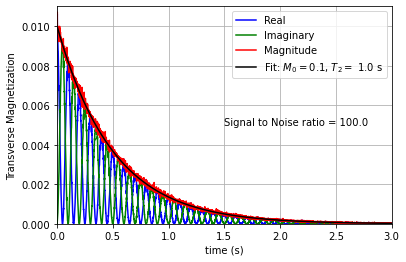

In [7]:
M0 = 0.1           # magnitude of transverse magnetization at t=0
f_b = 5.          # beat frequency
T2 = 1          # T2 relaxation time
sigma = 0.001    # noise level, standard deviation of normal distribution centred on zero



# Generate time points in seconds.  Here, I used one point every ms for 3 seconds.
npts = 3001
tpts = np.linspace(0,3,npts)



# Generate in- and out-of-phase (aka 'real' and 'imaginary') precession signal data.
# The signal is demodulated to give a low frequency beat (i.e. f_beat = f_precession - f_receiver)
# that will pass through the low pass filter of the detection system
# Non-correlated noise is generated independently for the real and imaginary signals.
    
real = M0*np.cos(2*np.pi*f_b*tpts)*np.exp(-tpts/T2)
r_noise = sigma*np.random.randn(npts)

imag = M0*np.sin(2*np.pi*f_b*tpts)*np.exp(-tpts/T2)
i_noise = sigma*np.random.randn(npts)

real_n = real + r_noise
imag_n = imag + i_noise



# Generate the magnitude data from the real and imaginary data. Without and with noise.

#mag = np.sqrt(real**2+imag**2)
mag_n = real_n**2+imag_n**2



 # Define the fitting function and parameters   
def func_mag(t,m0,t2):        
    return ((m0)**2)*np.exp(-2*t/t2)




# Run curve fit and generate fit function data 

guess = [M0,T2]       # inital guesses (use model parameters for simplicity)
popt, pcov = curve_fit(func_mag, tpts, mag_n, p0=guess)     # curve fit
#print(popt[0],popt[1])                                      # ouput fit parameters M0 and T2
fitmag = func_mag(tpts, popt[0],popt[1])                    # generate fit function data



plt.plot(tpts, real_n**2, 'b', tpts, imag_n**2, 'g', tpts, mag_n, 'r', tpts, fitmag, 'k')
plt.axis([0, 3, 0, (M0**2)*1.1])
plt.grid(True)
plt.xlabel('time (s)')
plt.ylabel('Transverse Magnetization')
plt.legend(('Real','Imaginary', 'Magnitude', 'Fit: '+ '$M_0 =$' + str(round(popt[0],3))
          +',' + ' $T_2 =$ ' + str(round(popt[1],3)) + ' s' ),loc='upper right')
#plt.title('Free Induction Decay - with noise')


stats = []
trials = 100
M0vals = np.zeros(trials)
T2starvals = np.zeros(trials)
#print(T2star)
for i in range(0, trials):
    real = M0*np.cos(2*np.pi*f_b*tpts)*np.exp(-tpts/T2) #Mx
    r_noise = sigma*np.random.randn(npts) #nx

    imag = M0*np.sin(2*np.pi*f_b*tpts)*np.exp(-tpts/T2) #My
    i_noise = sigma*np.random.randn(npts) #ny

    real_n = real + r_noise
    imag_n = imag + i_noise

    mag = np.sqrt(real**2+imag**2)
    mag_n = real_n**2+imag_n**2

    T2starvals[i] = np.array(popt[1])
    #T2star = np.append(T2star, stats)
    M0vals[i] = popt[0]
    
    guess = [M0,T2]       # inital guesses (use model parameters for simplicity)
    popt, pcov = curve_fit(func_mag, tpts, mag_n, p0=guess)     # curve fit
    fitmag = func_mag(tpts, popt[0],popt[1])                    # generate fit function data
print(f'Mean of T_2 is {np.mean(T2starvals)}, and standard deviation is {np.std(T2starvals)}')
print(f'Mean of M_0  is {np.mean(M0vals)}, and standard deviation is {np.std(M0vals)}')
plt.text(1.5,0.005 , f'Signal to Noise ratio = {np.round(np.mean(M0vals)/sigma)}')

plt.savefig(f'Sq_no_offset_M0={M0}_Sigma={sigma}.png', bbox_inches = 'tight')


In [170]:
T2 = popt[1]
stats = []
trials = 500
#sum = 0;
#T2star = np.array(popt[1])
for i in range(0, trials):
    T2star = np.array(popt[1])
    #sum = sum + T2star[i]
    T2star = np.append(T2star, stats)
print(T2star)

[5.02026975]
